In [1]:
using LinearAlgebra
using Plots

In [2]:
DUMP_DIR = joinpath(@__DIR__, "..", "dump", "sparsity")
NNSDP_PATH = joinpath(@__DIR__, "..", "src", "NnSdp.jl")
include(NNSDP_PATH); using .NnSdp

In [3]:
# colors = theme_palette(:auto)
colors = palette(:tab10)

# xdims = [3;3;3;3;3;3]
# ffnet = randomNetwork(xdims)
# zdims = ffnet.zdims
# N = sum(zdims[1:end-1])
# K = ffnet.K

# S(k) = sum(ffnet.xdims[1:k])

# E1 = E(1, ffnet.zdims)
# EK = E(K, ffnet.zdims)
# Ea = E(K+1, ffnet.zdims)
# Ein = [E1; Ea]
# Eout = [E1; EK; Ea]
;

In [4]:
hots(X) = map(x -> (x != 0), X)

function makeVs(xdims)
    K = length(xdims)-1
    S(k) = sum(xdims[1:k])
    Vs = Vector{Any}()
    for k in 1:K
        Vk = S(k-1)+1:S(k)
        push!(Vs, Vk)
    end
    return Vs
end

function quickEM(xdims)
    Vs = makeVs(xdims)
    K, N = length(xdims)-1, sum(xdims[1:end-1])
    Z = zeros(N+1, N+1)
    for k in 1:K-1
        Z[Vs[k], Vs[k]] .+= 1
        Z[Vs[k], Vs[k+1]] .+= 1
        Z[Vs[k+1], Vs[k]] .+= 1
        Z[Vs[k+1], Vs[k+1]] .+= 1
    end
    return hots(Z)
end

function quickE1K(xdims)
    Vs = makeVs(xdims)
    K, N = length(xdims)-1, sum(xdims[1:end-1])
    Z = zeros(N+1, N+1)
    Z[Vs[1], Vs[K]] .+= 1
    Z[Vs[K], Vs[1]] .+= 1
    return hots(Z)
end

function quickEa(xdims)
    Vs = makeVs(xdims)
    N = sum(xdims[1:end-1])
    Z = zeros(N+1, N+1)
    Z[:,end] .+= 1
    Z[end,:] .+= 1
    return hots(Z)
end

function quickEK(xdims)
    Vs = makeVs(xdims)
    K, N = length(xdims)-1, sum(xdims[1:end-1])
    Z = zeros(N+1, N+1)
    Z[:,Vs[K]] .+= 1
    Z[Vs[K],:] .+= 1
    return hots(Z)
end

function quickZ(xdims)
   return hots(quickEM(xdims) + quickE1K(xdims) + quickEa(xdims)) 
end

function quickClique(k, xdims)
    Vs = makeVs(xdims)
    K, N = length(xdims)-1, sum(xdims[1:end-1])
    Z = zeros(N+1, N+1)
    Ck = VecInt([Vs[k]; Vs[k+1]; Vs[K]; N+1])
    Z[Ck, Ck] .+= 1
    return hots(Z)
end

quickClique (generic function with 1 method)

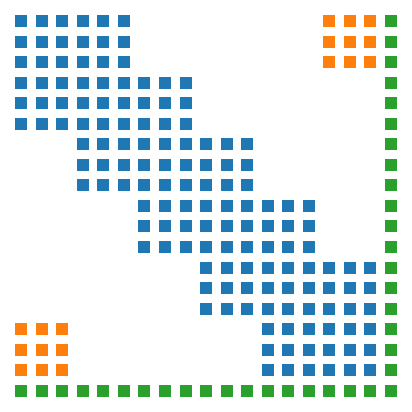

In [5]:
xdimsa = [3;3;3;3;3;3;3]
plt = spy(quickEM(xdimsa), marker=(:square, 8.0, colors[1]), axis=([], false))
spy!(quickE1K(xdimsa), marker=(:square, 8.0, colors[2]), axis=([], false))
spy!(quickEa(xdimsa), marker=(:square, 8.0, colors[3]), axis=([], false))
savefig(plt, joinpath(DUMP_DIR, "Z-colors-a.png"))
# plt

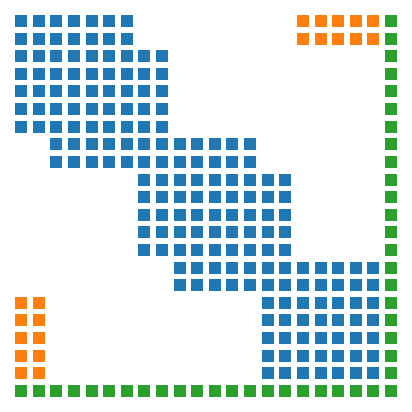

In [6]:
xdimsb = [2;5;2;5;2;5;2]
plt = spy(quickEM(xdimsb), marker=(:square, 8.0, colors[1]), axis=([], false))
spy!(quickE1K(xdimsb), marker=(:square, 8.0, colors[2]), axis=([], false))
spy!(quickEa(xdimsb), marker=(:square, 8.0, colors[3]), axis=([], false))
savefig(plt, joinpath(DUMP_DIR, "Z-colors-b.png"))
# plt

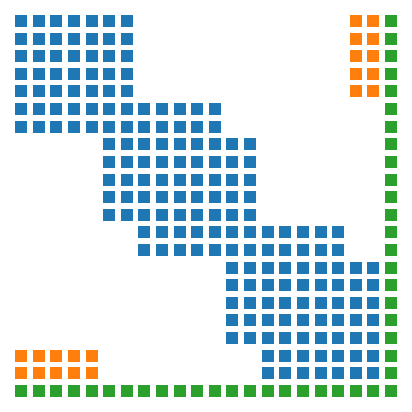

In [7]:
xdimsc = [5;2;5;2;5;2;5]
plt = spy(quickEM(xdimsc), marker=(:square, 8.0, colors[1]), axis=([], false))
spy!(quickE1K(xdimsc), marker=(:square, 8.0, colors[2]), axis=([], false))
spy!(quickEa(xdimsc), marker=(:square, 8.0, colors[3]), axis=([], false))
savefig(plt, joinpath(DUMP_DIR, "Z-colors-c.png"))
# plt

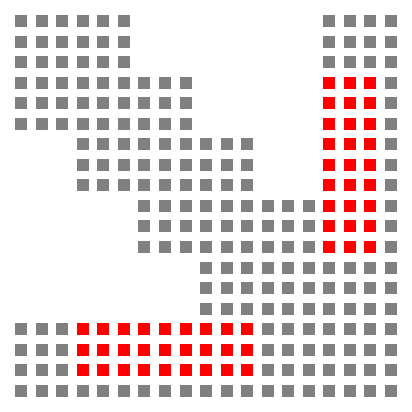

In [8]:
plt = spy(quickEK(xdimsa),
  marker = (:square, 8.0, "red"),
  axis=([], false)
)

plt = spy!(plt, quickZ(xdimsa),
  marker = (:square, 8.0, "gray"),
  axis=([], false),
)

savefig(plt, joinpath(DUMP_DIR, "Z-extension-a.png"))

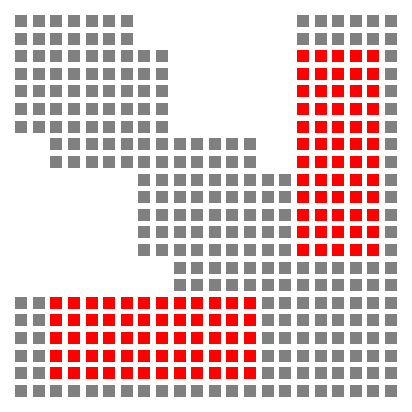

In [9]:
plt = spy(quickEK(xdimsb),
  marker = (:square, 8.0, "red"),
  axis=([], false)
)

plt = spy!(plt, quickZ(xdimsb),
  marker = (:square, 8.0, "gray"),
  axis=([], false),
)

savefig(plt, joinpath(DUMP_DIR, "Z-extension-b.png"))

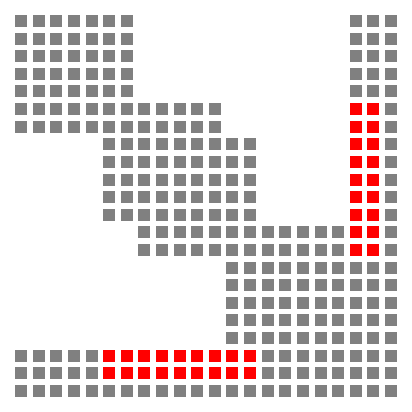

In [10]:
plt = spy(quickEK(xdimsc),
  marker = (:square, 8.0, "red"),
  axis=([], false)
)

plt = spy!(plt, quickZ(xdimsc),
  marker = (:square, 8.0, "gray"),
  axis=([], false),
)

savefig(plt, joinpath(DUMP_DIR, "Z-extension-c.png"))

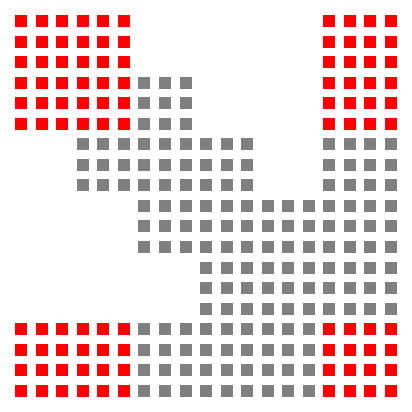

In [11]:
plt = spy(hots(quickEK(xdimsa) + quickZ(xdimsa)),
  marker = (:square, 8.0, "gray"),
  axis=([], false)
)

plt = spy!(plt, quickClique(1, xdimsa),
  marker = (:square, 8.0, "red"),
  axis=([], false),
)

savefig(plt, joinpath(DUMP_DIR, "Z-clique-1.png"));
# plt

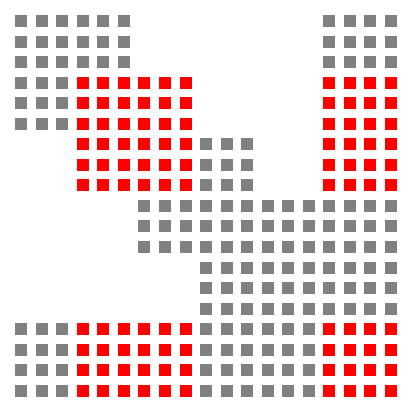

In [12]:
plt = spy(quickClique(2, xdimsa),
  marker = (:square, 8.0, "red"),
  axis=([], false),
)

plt = spy!(plt, hots(quickEK(xdimsa) + quickZ(xdimsa)) - hots(quickClique(2, xdimsa)),
  marker = (:square, 8.0, "gray"),
  axis=([], false)
)

savefig(plt, joinpath(DUMP_DIR, "Z-clique-2.png"));
# plt

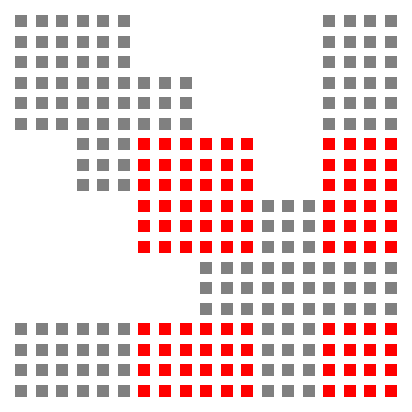

In [13]:
plt = spy(quickClique(3, xdimsa),
  marker = (:square, 8.0, "red"),
  axis=([], false),
)

plt = spy!(plt, hots(quickEK(xdimsa) + quickZ(xdimsa)) - hots(quickClique(3, xdimsa)),
  marker = (:square, 8.0, "gray"),
  axis=([], false)
)

savefig(plt, joinpath(DUMP_DIR, "Z-clique-3.png"));
# plt